### Basic regression: Predict fuel efficiency 

In a regression problem, the aim is to predict the output of a continuous value, like a price or a probability. Contrast this with a classification problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles. To do this, you will provide the models with a description of many automobiles from that time period. This description includes attributes like cylinders, displacement, horsepower, and weight.

This example uses the Keras API. (Visit the Keras tutorials and guides to learn more.)

- source - https://www.tensorflow.org/tutorials/keras/regression



In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import sys

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

print(tf.__version__)

tf.config.list_physical_devices('GPU')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

os.system('date')


2.15.0
Sat 24 Feb 2024 07:05:33 PM -03


0

In [53]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [54]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024)])
  except RuntimeError as e:
    print(e)

In [55]:
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

### Generate dataset to world around with deep learning.

- How we can build a model and improve it.

In [56]:
import random
from scipy import stats

In [57]:
# define size dataset
# number of points - for line:
npoints = 100
pertrain = 0.8 # 0 - 100%
pertest = 1 - pertrain

limit = 3

In [58]:
arrXtrain = []
arrytrain = []

for ipoint in range(0, npoints):
    arrXtrain.append(ipoint)
    arrytrain.append(2 * ipoint)

In [59]:
ntrain = int(npoints * pertrain)
X = []
y = []

for i in range(0, ntrain):
    errx = round(random.uniform(0, limit), 2)
    X.append(i+errx)

    erry = round(random.uniform(0, limit), 2)
    y.append(2 * i + erry)


X_train = np.array(X)
y_train = np.array(y)

X_train, y_train

(array([ 0.67,  3.27,  4.74,  3.43,  4.05,  5.4 ,  8.47,  8.18,  8.77,
        11.39, 12.28, 12.26, 14.85, 14.67, 16.52, 15.24, 17.86, 19.99,
        20.42, 21.47, 21.11, 22.56, 24.61, 23.44, 26.41, 25.91, 27.23,
        28.96, 28.72, 30.48, 30.41, 33.51, 33.04, 34.87, 34.57, 37.25,
        37.78, 37.84, 40.85, 40.85, 42.96, 41.91, 43.76, 43.85, 44.82,
        47.7 , 47.41, 47.05, 48.2 , 49.44, 51.88, 51.52, 54.54, 54.65,
        54.9 , 57.11, 56.91, 58.77, 59.76, 60.05, 61.89, 62.03, 63.95,
        64.77, 65.64, 66.6 , 67.33, 69.83, 68.1 , 69.13, 70.35, 72.54,
        72.34, 74.93, 74.62, 77.58, 77.21, 77.2 , 80.52, 80.94]),
 array([  1.74,   3.36,   5.66,   7.78,  10.5 ,  11.03,  12.77,  15.09,
         17.98,  18.22,  22.31,  24.03,  24.48,  28.07,  28.22,  32.15,
         32.71,  34.91,  38.99,  40.54,  40.6 ,  43.22,  46.66,  47.18,
         49.64,  51.28,  53.87,  55.67,  56.04,  59.76,  61.68,  62.79,
         64.74,  66.41,  70.28,  70.81,  74.5 ,  74.11,  76.37,  79.83,
      

In [60]:
X = []
y = []

for i in range(ntrain, npoints):
    errx = round(random.uniform(0, limit), 2)
    X.append(i+errx)

    erry = round(random.uniform(0, limit), 2)
    y.append(2 * i + erry)


X_test = np.array(X)
y_test = np.array(y)

X_test , y_test 

(array([ 82.73,  82.37,  83.93,  83.99,  85.85,  86.28,  88.01,  88.62,
         88.37,  89.5 ,  91.31,  91.57,  94.47,  93.66,  96.23,  95.11,
         96.1 ,  99.59,  99.4 , 100.88]),
 array([162.01, 163.32, 164.36, 167.81, 170.89, 171.99, 172.04, 176.91,
        178.89, 179.99, 182.25, 182.81, 186.4 , 188.38, 190.67, 191.9 ,
        193.78, 195.98, 198.1 , 198.15]))

In [61]:
print(f"Size X train - {len(X_train)} points")
print(f"Size y train - {len(y_train)} points")
print(f"Size X test -  {len(X_test)} points")
print(f"Size y test  - {len(y_test)} points")

Size X train - 80 points
Size y train - 80 points
Size X test -  20 points
Size y test  - 20 points


In [62]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)

In [63]:
# Creating a DataFrame with two columns: 'X' for features and 'y' for the target variable
df = pd.DataFrame({'X': arrXtrain, 'y': arrytrain})

print("DataFrame with two columns (X and y):")
print(df)

DataFrame with two columns (X and y):
     X    y
0    0    0
1    1    2
2    2    4
3    3    6
4    4    8
..  ..  ...
95  95  190
96  96  192
97  97  194
98  98  196
99  99  198

[100 rows x 2 columns]


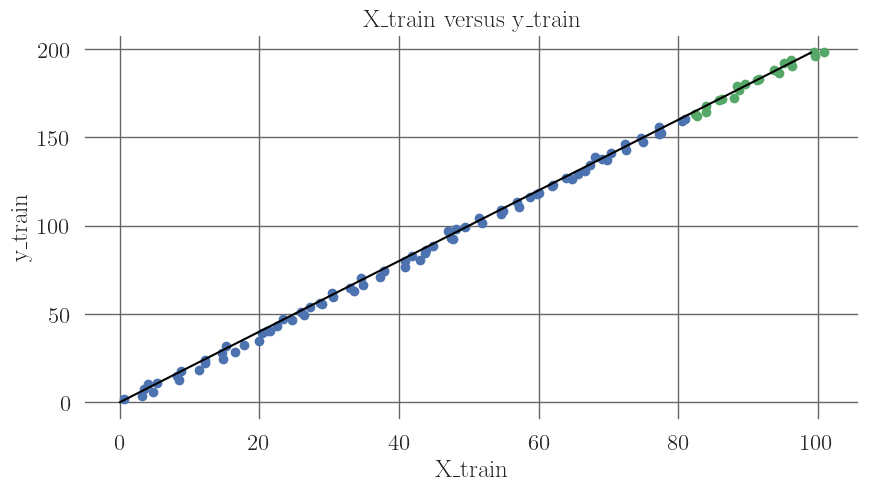

In [64]:
plt.scatter(X_train, y_train, color='b')
plt.scatter(X_test, y_test, color='g')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.title(' X_train versus y_train ')
plt.plot(arrXtrain, arrytrain, linestyle='-', color='black')  # '-' for solid line style
plt.show()

In [65]:
#Set random seed 
tf.random.set_seed(42) 

# Create a model (same as above) 
model = tf.keras.Sequential([ tf.keras.layers.Dense(1) ]) 

# Compile model (same as above) 
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(), 
              metrics=["mae"]) 

# Fit model (this time we'll train for longer) 
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50) # train for 100 epochs not 10

Epoch 1/50


3/3 [==============================] - 0s 5ms/step - loss: 72.9491 - mae: 72.9491
Epoch 2/50
3/3 [==============================] - 0s 4ms/step - loss: 21.9818 - mae: 21.9818
Epoch 3/50
3/3 [==============================] - 0s 5ms/step - loss: 8.7921 - mae: 8.7921
Epoch 4/50
3/3 [==============================] - 0s 4ms/step - loss: 7.9787 - mae: 7.9787
Epoch 5/50
3/3 [==============================] - 0s 5ms/step - loss: 8.2195 - mae: 8.2195
Epoch 6/50
3/3 [==============================] - 0s 6ms/step - loss: 7.2587 - mae: 7.2587
Epoch 7/50
3/3 [==============================] - 0s 4ms/step - loss: 8.6746 - mae: 8.6746
Epoch 8/50
3/3 [==============================] - 0s 17ms/step - loss: 6.7075 - mae: 6.7075
Epoch 9/50
3/3 [==============================] - 0s 6ms/step - loss: 9.1120 - mae: 9.1120
Epoch 10/50
3/3 [==============================] - 0s 9ms/step - loss: 4.6937 - mae: 4.6937
Epoch 11/50
3/3 [==============================] - 0s 6ms/step - loss: 7.2796 - mae: 7.2796
Epo

In [66]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


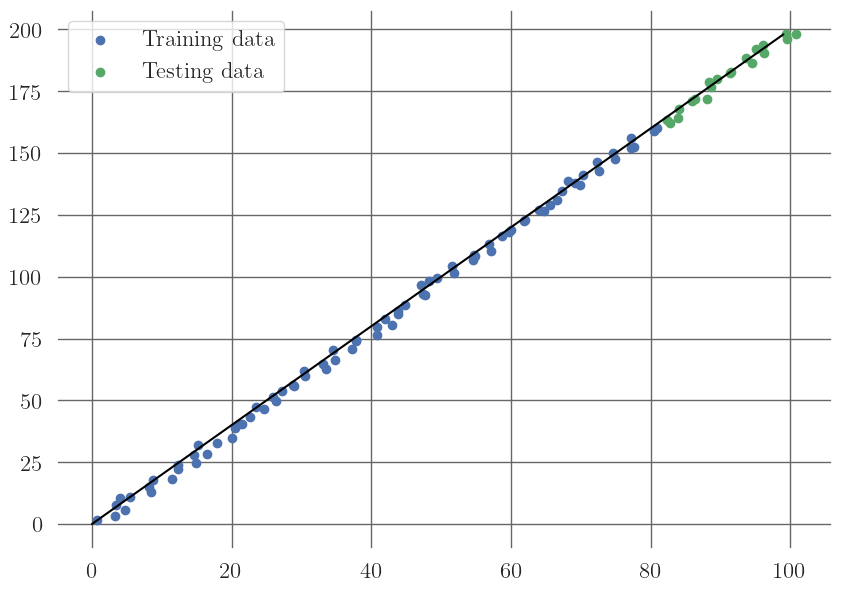

In [67]:
plt.figure(figsize=(10, 7)) 

# Plot training data in blue 
plt.scatter(X_train, y_train, c='b', label='Training data') 

# Plot test data in green 
plt.scatter(X_test, y_test, c='g', label='Testing data') 

plt.plot(arrXtrain, arrytrain, linestyle='-', color='black')  # '-' for solid line style

# Show the legend 
plt.legend();

In [68]:
# Make predictions 
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 52ms/step


array([[186.588],
       [185.776],
       [189.294],
       [189.43 ],
       [193.624],
       [194.594],
       [198.495],
       [199.871],
       [199.307],
       [201.856],
       [205.937],
       [206.524],
       [213.064],
       [211.237],
       [217.033],
       [214.507],
       [216.74 ],
       [224.61 ],
       [224.181],
       [227.519]], dtype=float32)

In [69]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
sns.set_style({'axes.facecolor':'white', 'grid.color': '.4', 'font.family':'Times New Roman'})

In [70]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds, 
                     arrXtrain=arrXtrain, 
                     arrytrain=arrytrain): 
    """ Plots training data, test data and compares predictions. """ 

    plt.figure(figsize=(10, 7)) 
    
    # Plot training data in blue 
    plt.scatter(train_data, train_labels, c="b", label="Training data")
     
    # Plot test data in green 
    plt.scatter(test_data, test_labels, c="g", label="Testing data") 
    
    # Plot the predictions in red (predictions were made on the test data) 
    plt.scatter(test_data, predictions, c="r", label="Predictions")

    plt.plot(arrXtrain, arrytrain, linestyle='-', color='black')  # '-' for solid line style
    
    # Show the legend 
    plt.legend();

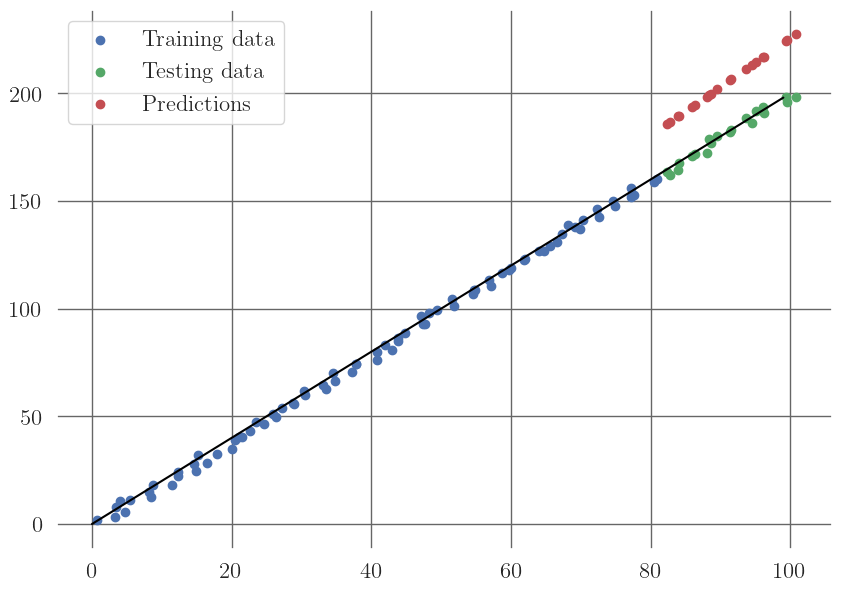

In [71]:
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds)

In [72]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 119ms/step - loss: 24.1779 - mae: 24.1779


[24.177892684936523, 24.177892684936523]

## Running experiments to improve a model

- model_1 - same as original model, 1 layer, trained for 100 epochs.

In [73]:
# Set random seed 
tf.random.set_seed(42) 

# Defina o EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Replicate original model 
model_1 = tf.keras.Sequential([ tf.keras.layers.Dense(1),
                                tf.keras.layers.Input((128, None, 6)) ]) 

# Compile the model 
model_1.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae']) 


# Fit the model 
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100


3/3 [==============================] - 0s 6ms/step - loss: 120.4892 - mae: 120.4892
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 68.8244 - mae: 68.8244
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 19.5419 - mae: 19.5419
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 8.6336 - mae: 8.6336
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 7.9369 - mae: 7.9369
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 7.7086 - mae: 7.7086
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 8.5946 - mae: 8.5946
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 6.2708 - mae: 6.2708
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 8.9728 - mae: 8.9728
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 5.1438 - mae: 5.1438
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 8.1097 - m

1/1 [==============================] - 0s 64ms/step


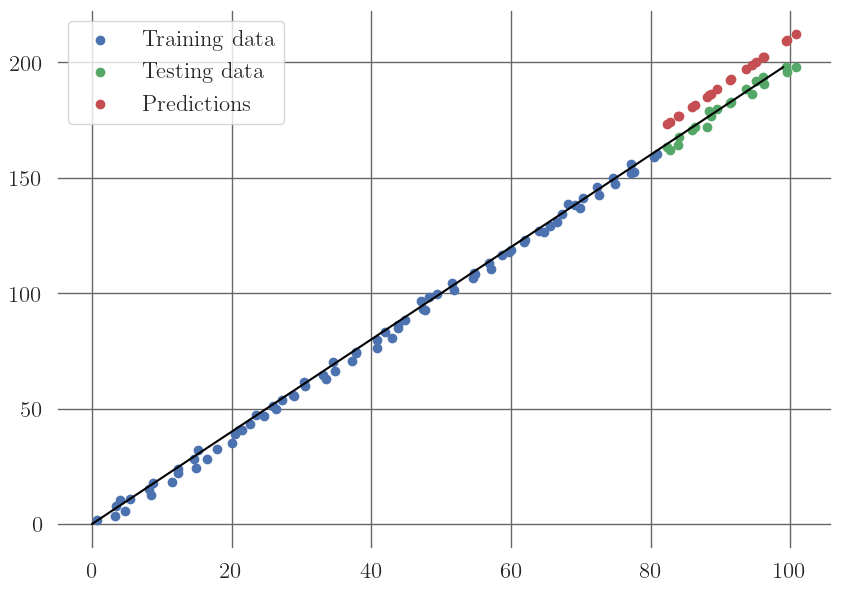

In [74]:
# Make and plot predictions for model_1 
y_preds_1 = model_1.predict(X_test) 

plot_predictions(predictions=y_preds_1)

- ```Build model_2```: This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

In [75]:
# Set random seed 
tf.random.set_seed(42) 

# Defina o EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Replicate model_1 and add an extra layer 
model_2 = tf.keras.Sequential([ tf.keras.layers.Dense(1), 
                               tf.keras.layers.Dense(1) # add a second layer 
                               ]) 

# Compile the model 
model_2.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae']) 

# Fit the model 
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 54ms/step


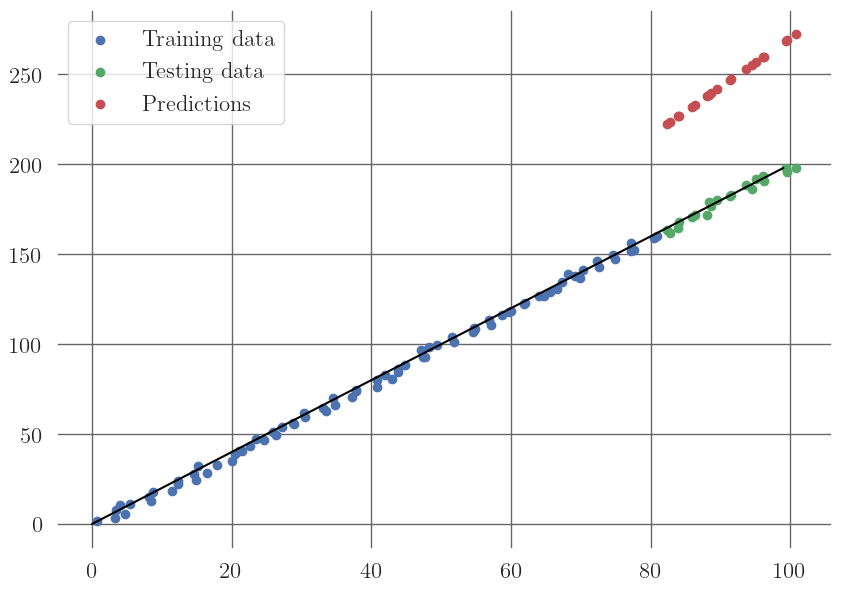

In [76]:
# Make and plot predictions for model_2 
y_preds_2 = model_2.predict(X_test)

plot_predictions(predictions=y_preds_2)

In [77]:
# Set random seed 
tf.random.set_seed(42) 

# Defina o EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

# Replicate model_2 
model_3 = tf.keras.Sequential([ tf.keras.layers.Dense(1), 
                                tf.keras.layers.Dense(1) ]) 

# Compile the model 
model_3.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.SGD(), 
                metrics=['mae']) 

# Defina o EarlyStopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# Fit the model (this time for 500 epochs, not 100) 
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 48ms/step


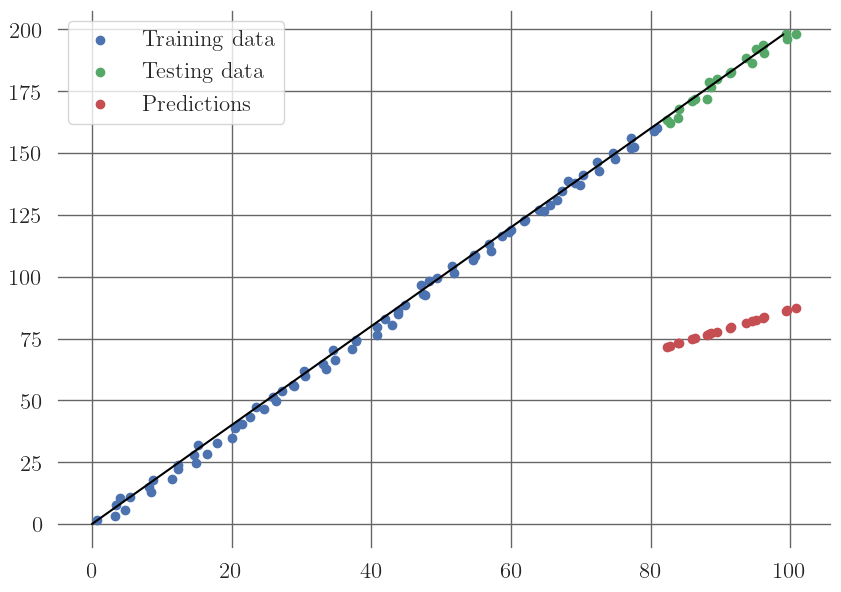

In [78]:
# Make and plot predictions for model_3 
y_preds_3 = model_3.predict(X_test) 

plot_predictions(predictions=y_preds_3)

In [79]:
%%time
# Set random seed 
tf.random.set_seed(42)

# Defina o EarlyStopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(1,), name='input_layer'),  # Hidden layer with 128 units
    tf.keras.layers.Dense(64, activation='relu'),  # Additional hidden layer with 64 units
    tf.keras.layers.Dense(32, activation='relu'),  # Additional hidden layer with 32 units
    tf.keras.layers.Dense(1, name='output_layer')  # Output layer for regression
])

# Compile the model
model_4.compile(optimizer='adam',
              loss='mean_squared_error',  # Use mean squared error for regression
              metrics=['mae'])   

# Assuming X_train and y_train are your input features and labels for training
# Assuming X_val and y_val are your input features and labels for validation

# Create a learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Defina o EarlyStopping callback
#early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=12)

history = model_4.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2, # 20% of the training data will be used for validation
                    #callbacks=[early_stopping],
                    #callbacks=[lr_scheduler],
                    verbose=1)  

Epoch 1/100
2/2 [==============================] - 1s 174ms/step - loss: 6106.5098 - mae: 67.8168 - val_loss: 22068.9688 - val_mae: 148.2427
Epoch 2/100
2/2 [==============================] - 0s 31ms/step - loss: 5691.3252 - mae: 65.4811 - val_loss: 20837.3359 - val_mae: 144.0466
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 5400.2627 - mae: 63.6915 - val_loss: 19741.9336 - val_mae: 140.2091
Epoch 4/100
2/2 [==============================] - 0s 30ms/step - loss: 5112.8423 - mae: 61.9891 - val_loss: 18961.2461 - val_mae: 137.4088
Epoch 5/100
2/2 [==============================] - 0s 37ms/step - loss: 4928.1045 - mae: 60.8581 - val_loss: 18377.0273 - val_mae: 135.2752
Epoch 6/100
2/2 [==============================] - 0s 52ms/step - loss: 4772.1826 - mae: 59.8714 - val_loss: 17746.6172 - val_mae: 132.9346
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 4611.9727 - mae: 58.8333 - val_loss: 17126.0195 - val_mae: 130.5894
Epoch 8/100
2/2 [==

In [80]:
#lrs = 1e-3 * (10**(np.arange(100)/20))

In [81]:

#plt.semilogx(lrs, history.history["loss"]) # want the x-axis to be log-scale
#plt.xlabel("Learning rate")
#plt.ylabel("Loss")
#plt.title("Finding the ideal learning rate");

1/1 [==============================] - 0s 57ms/step


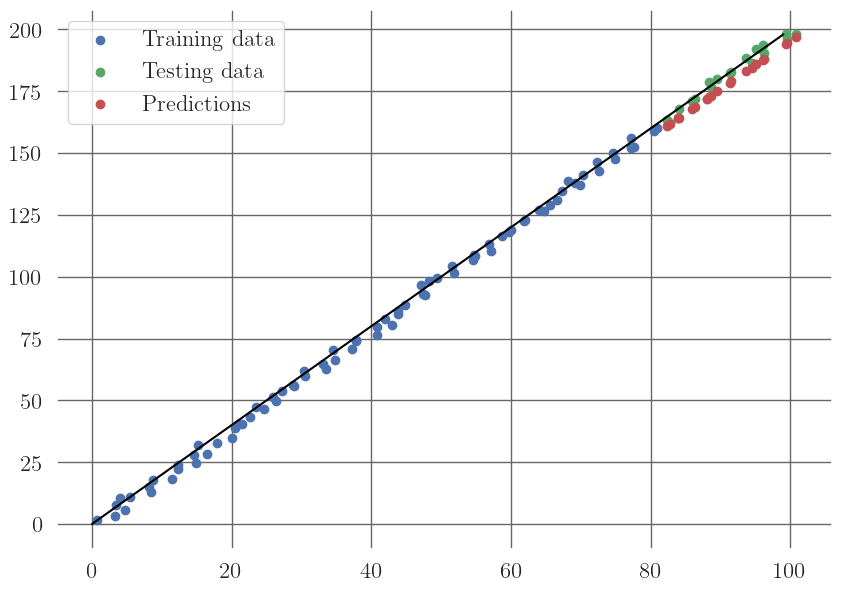

In [82]:
# Make and plot predictions for model_3 
y_preds_4 = model_4.predict(X_test) 

plot_predictions(predictions=y_preds_4)

In [83]:
model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 34ms/step - loss: 13.7511 - mae: 3.1795


[13.751119613647461, 3.1795220375061035]

In [84]:
# MAE
tf.keras.losses.mean_absolute_error(y_test, y_preds)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([10.841, 10.66 , 11.744, 11.798, 13.944, 14.607, 17.664, 19.04 ,
       18.476, 21.024, 25.106, 25.692, 32.232, 30.405, 36.201, 33.675,
       35.908, 43.778, 43.35 , 46.688], dtype=float32)>

In [85]:
def mae(y_test, y_pred): 
    """ Calculuates mean absolute error between y_test and y_preds. """ 

    return tf.metrics.mean_absolute_error(y_test, y_pred) 

def mse(y_test, y_pred): 
    """ Calculates mean squared error between y_test and y_preds. """
    
    return tf.metrics.mean_squared_error(y_test, y_pred)

In [86]:
mae = mae(y_test, y_preds)
mae

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([10.841, 10.66 , 11.744, 11.798, 13.944, 14.607, 17.664, 19.04 ,
       18.476, 21.024, 25.106, 25.692, 32.232, 30.405, 36.201, 33.675,
       35.908, 43.778, 43.35 , 46.688], dtype=float32)>

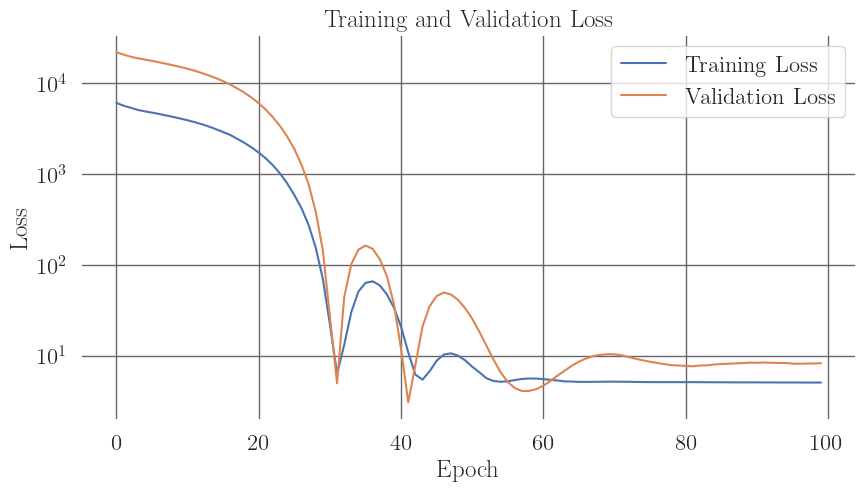

In [87]:
# Plot the training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log")
plt.legend()
plt.grid(True)
plt.show()

In [88]:
model_4.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               256       
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 output_layer (Dense)        (None, 1)                 33        
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


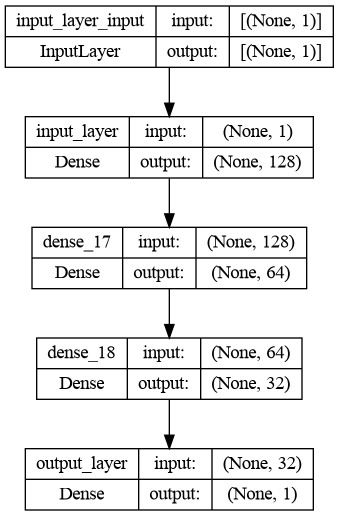

In [89]:
tf.keras.utils.plot_model(
    model_4,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False
)

In [90]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 848959788829405341
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1073741824
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13340010318474340766
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 750 Ti, pci bus id: 0000:01:00.0, compute capability: 5.0"
xla_global_id: 416903419
]


2024-02-24 19:05:55.727892: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 19:05:55.728166: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-24 19:05:55.728350: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [91]:
gpu_id = 0
if gpus:
    # Restrict TensorFlow to only use only one GPU based on gpu_id
    try:
        tf.config.set_visible_devices(gpus[gpu_id], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPU
